# TASK-04

In [4]:
# Analyze and visualize sentiment patterns in social media data to 
# understand public opinion and attitudes towards specific topics or 
# brands.

# DESCRIPTION

In [5]:
# This is an entity-level sentiment analysis dataset of twitter. 
# Given a message and an entity, the task is to judge the sentiment 
# of the message about the entity. There are three classes in this 
# dataset: Positive, Negative and Neutral. We regard messages that 
# are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [7]:
data = pd.read_csv('twitter_training.csv')

In [8]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [10]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.shape

(74682, 4)

In [12]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [13]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [26]:
df.describe(include=object)

,Entity,Sentiment,Content
count,71656,71656,71656
unique,32,4,69491
top,TomClancysRainbowSix,Negative,It is not the first time that the EU Commissio...
freq,2328,21698,172


In [14]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [15]:
df.dropna(axis=0 , inplace=True)

In [16]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [17]:
df.duplicated().sum()

2340

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.shape

(71656, 4)

In [20]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

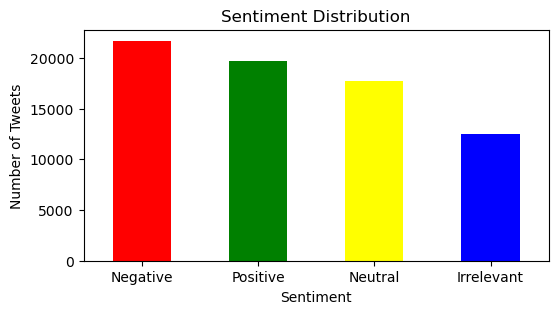

In [21]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [22]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

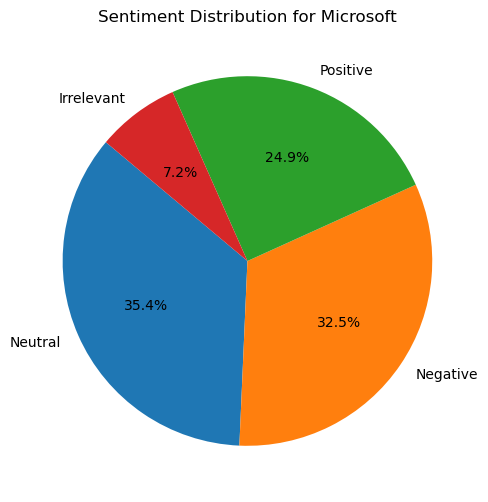

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()

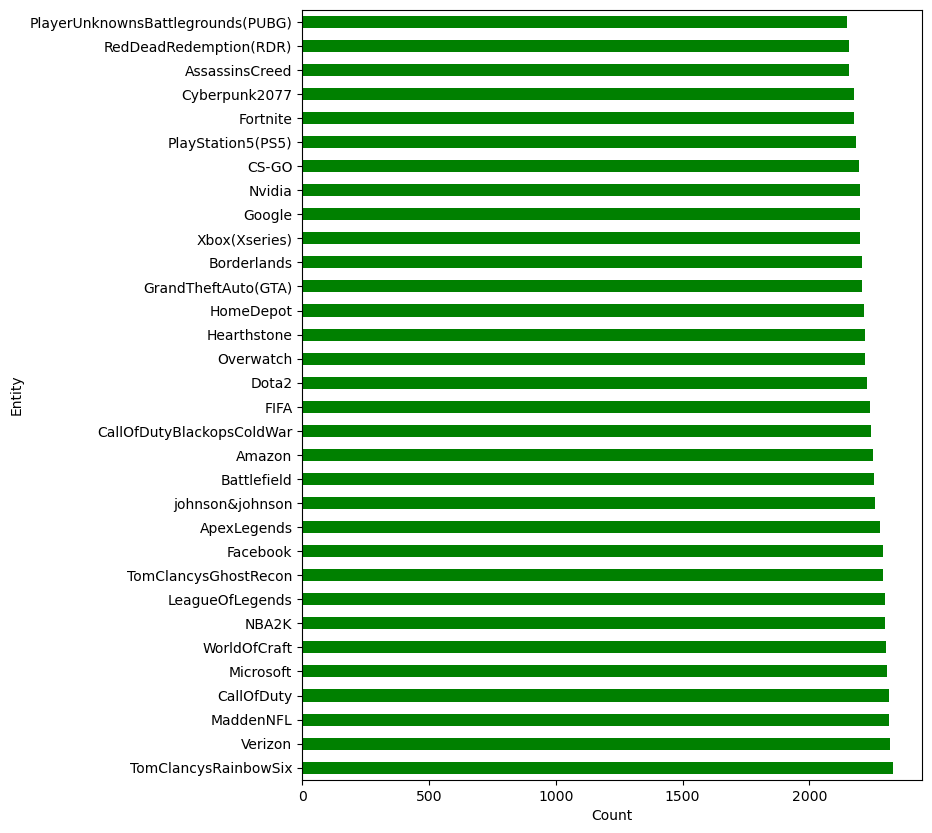

In [27]:
plt.figure(figsize=(8,10))
df['Entity'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

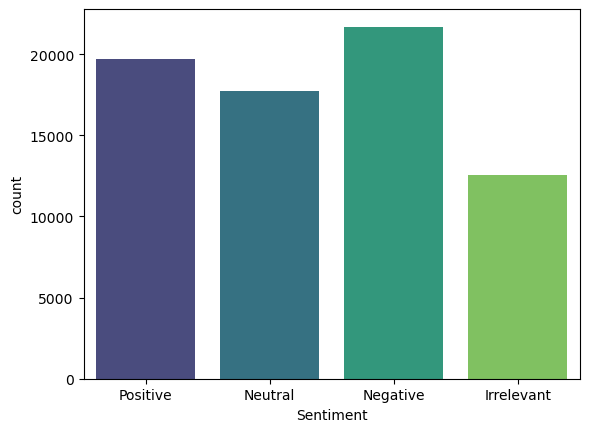

In [29]:
sns.countplot(x = 'Sentiment',data=df,palette='viridis')
plt.show()

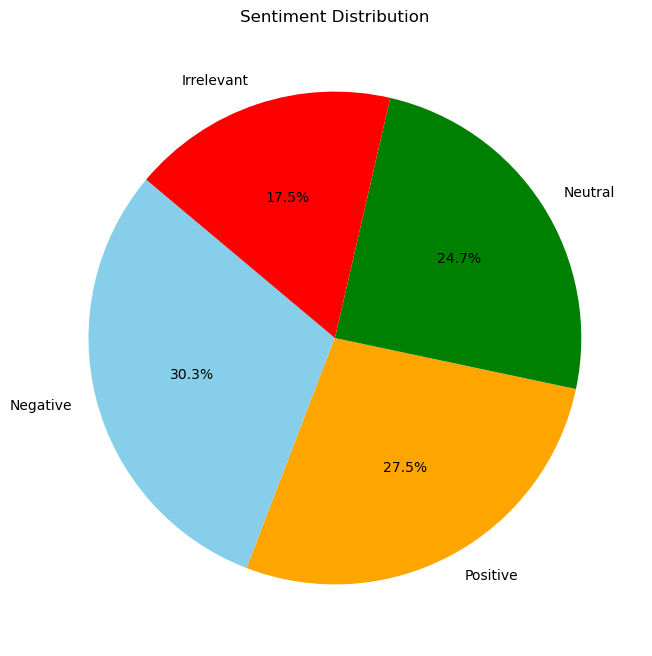

In [30]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [31]:
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


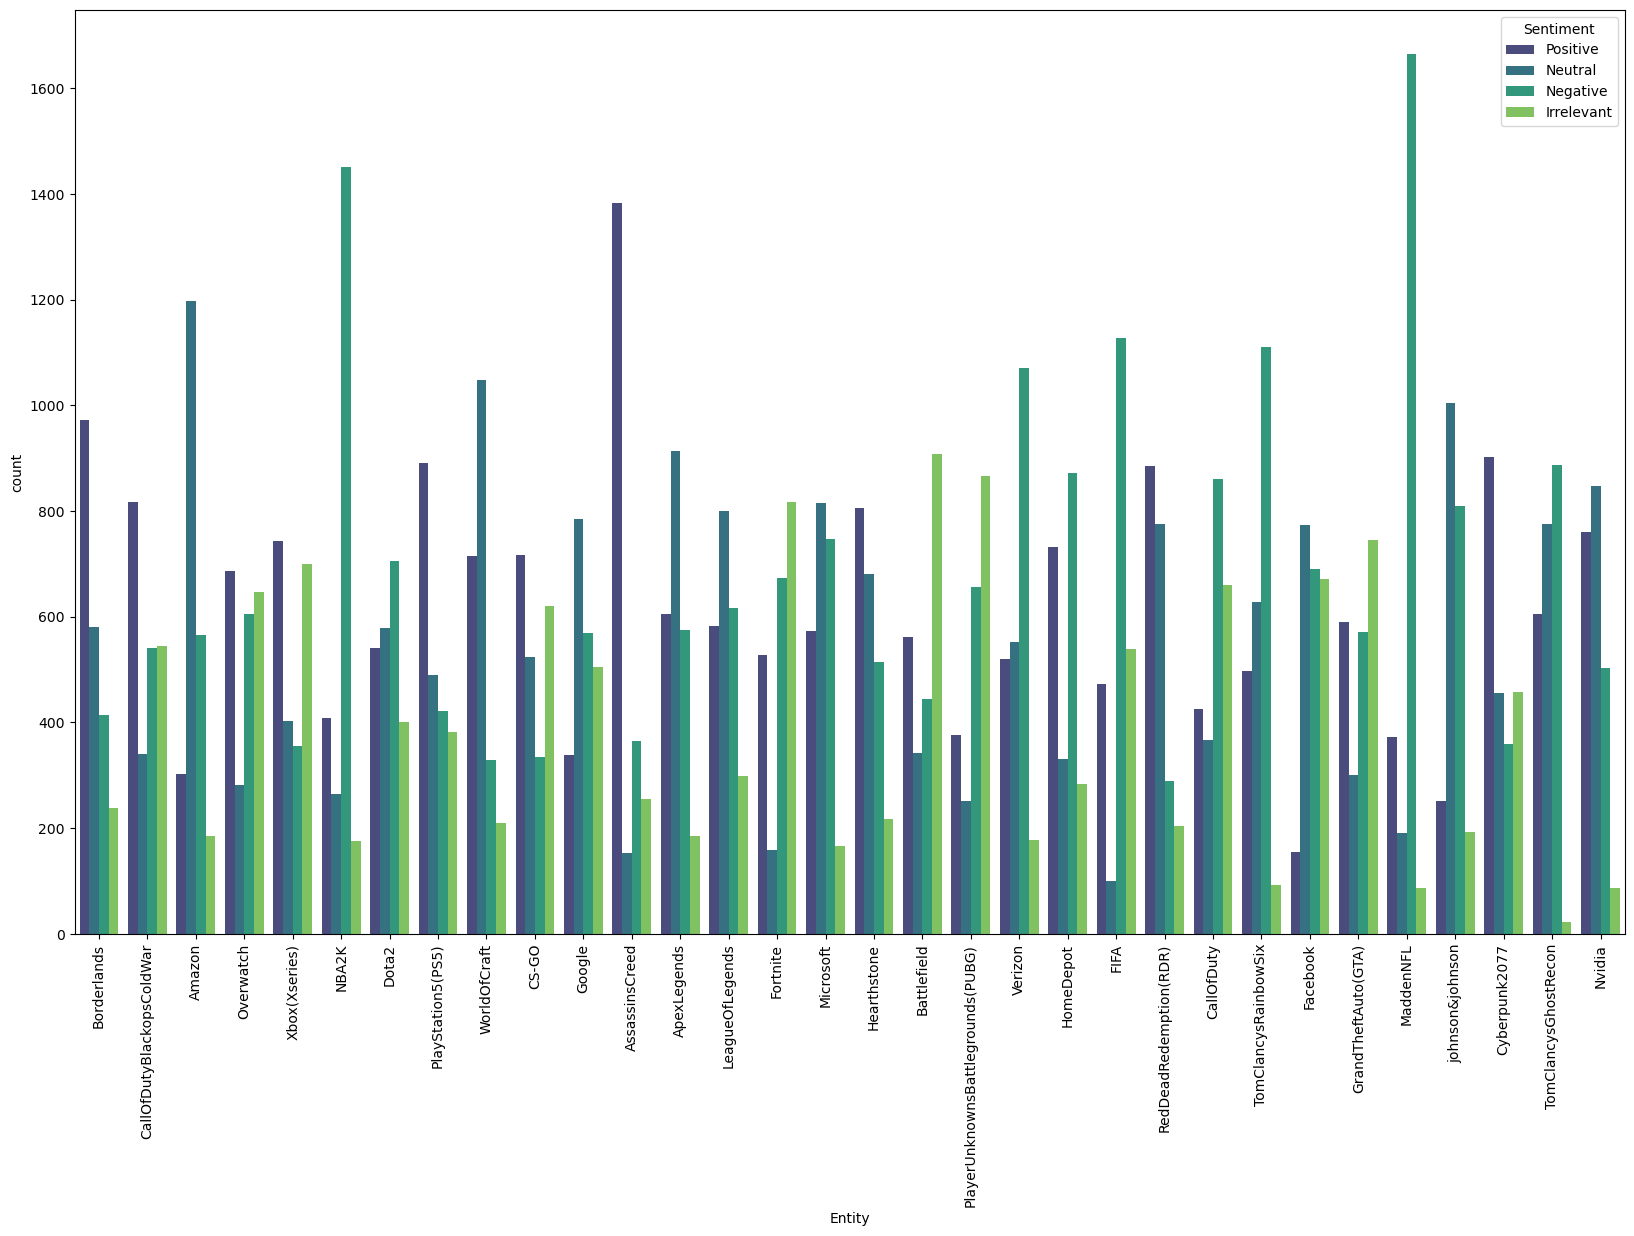

In [33]:
plt.figure(figsize=(20,12))
sns.countplot(x='Entity',data=df,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [38]:
## Group by Topic and Sentiment
entity_wise_sentiment = df.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
entity_counts = df['Entity'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Entity'].isin(entity_counts)]

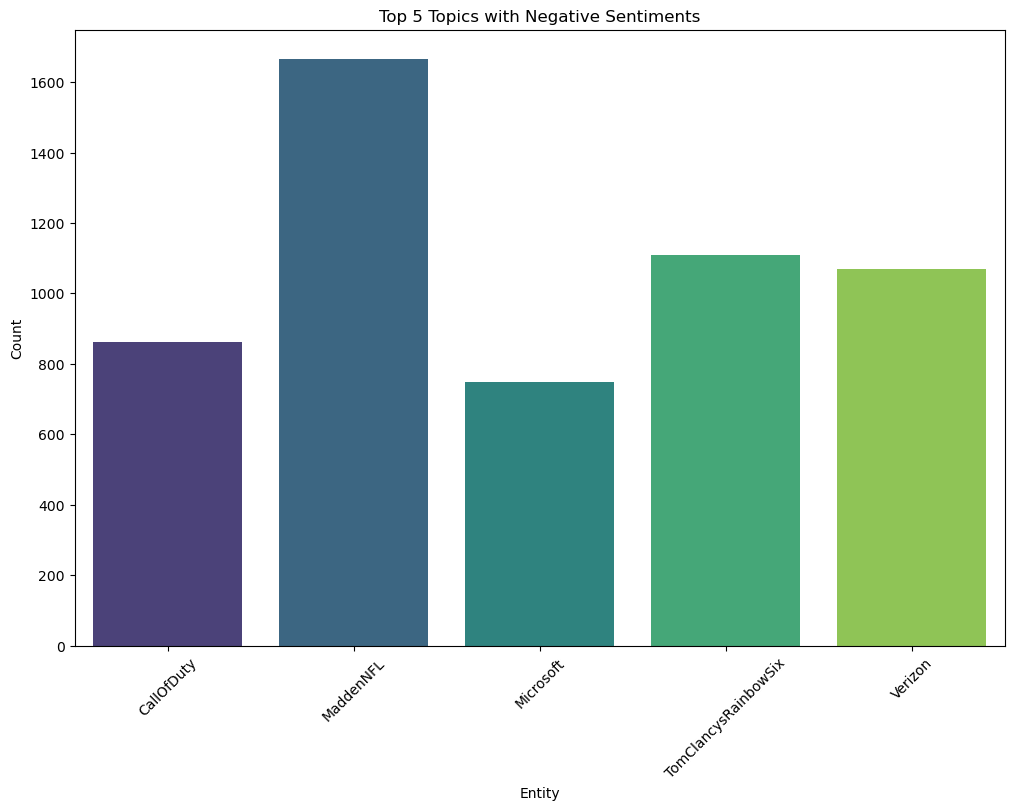

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Entity', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

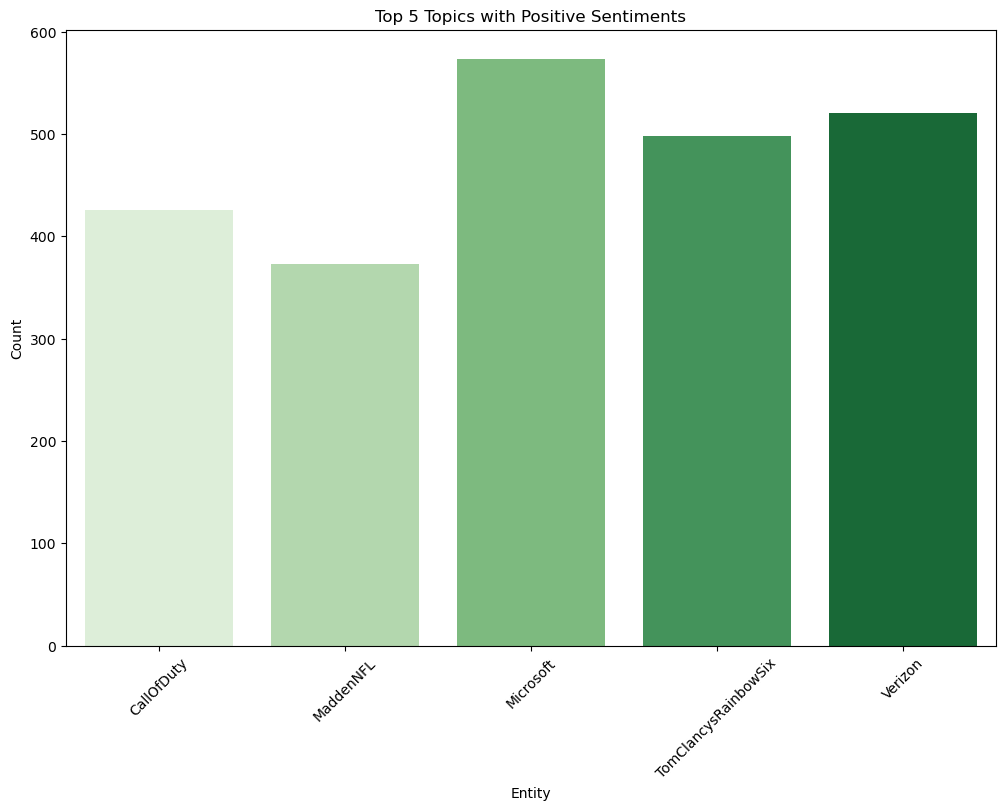

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Entity', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

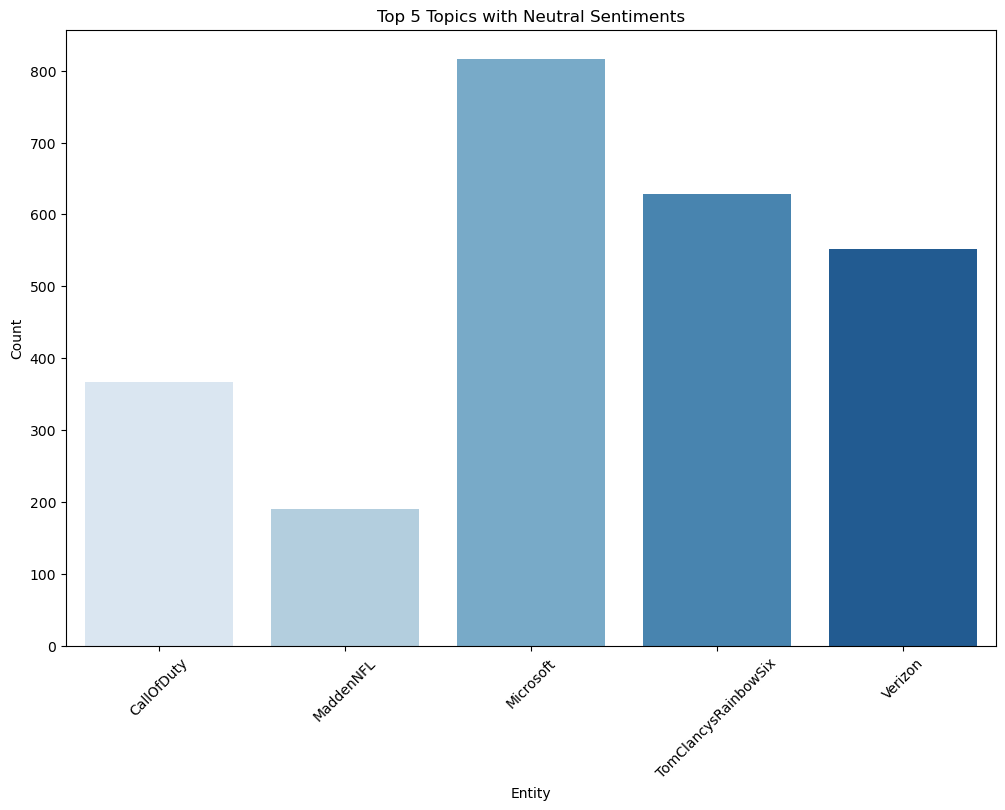

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Entity', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

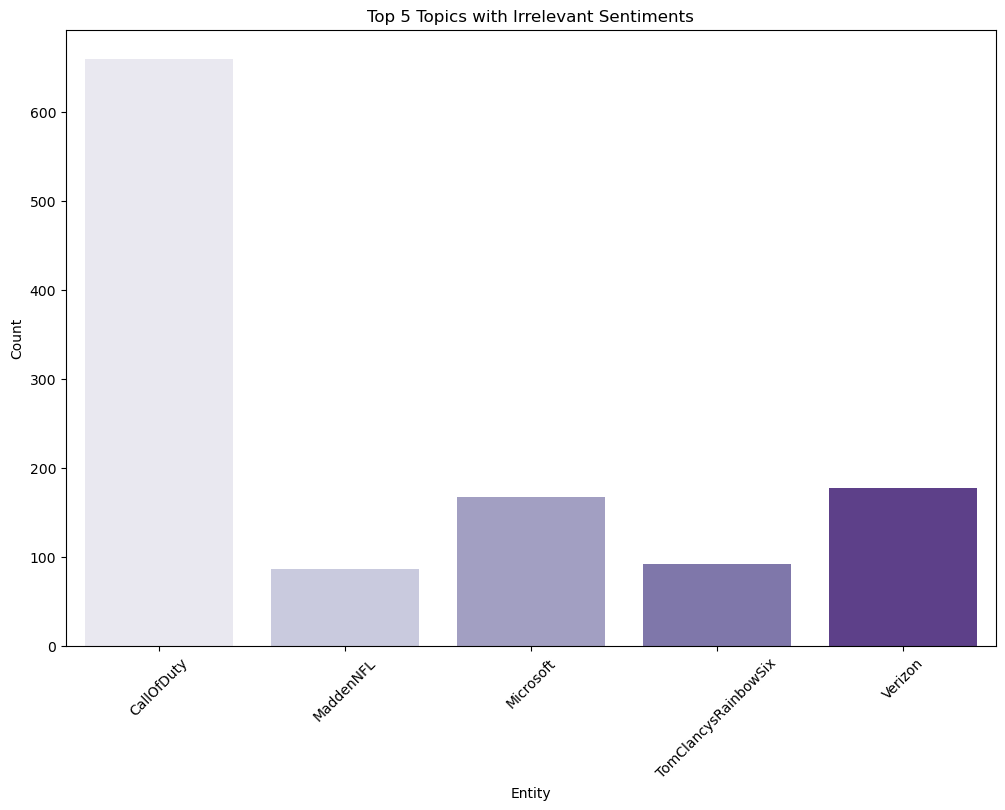

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Entity', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

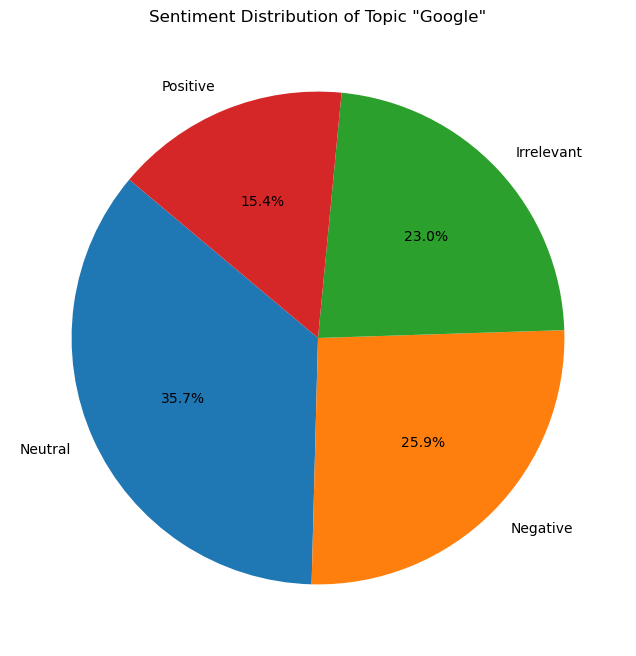

In [44]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Entity'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

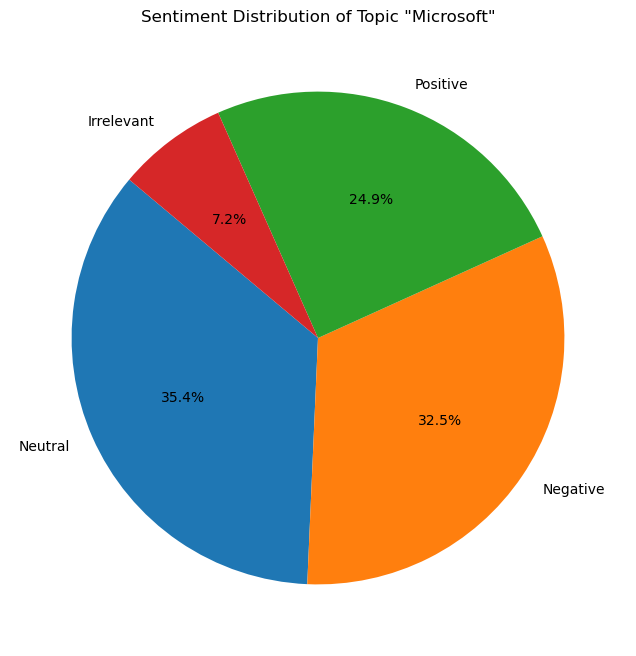

In [45]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = df[df['Entity'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [47]:
df['msg_len'] = df['Content'].apply(len)

In [48]:
df

,ID,Entity,Sentiment,Content,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


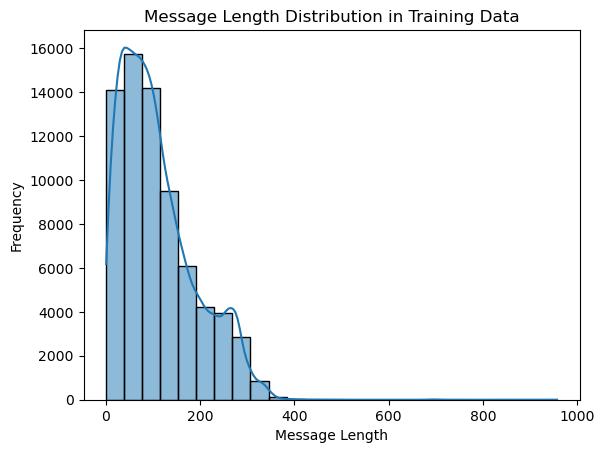

In [49]:
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

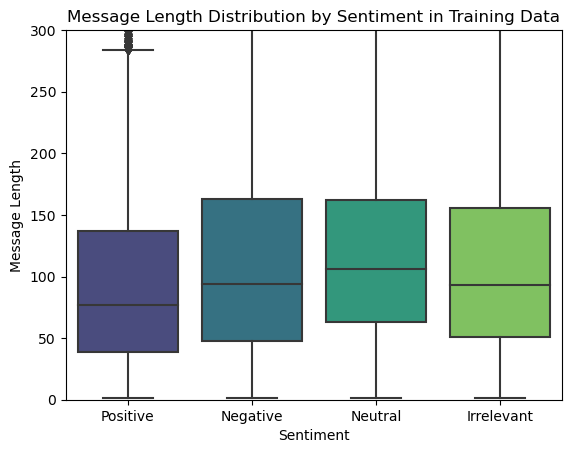

In [50]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

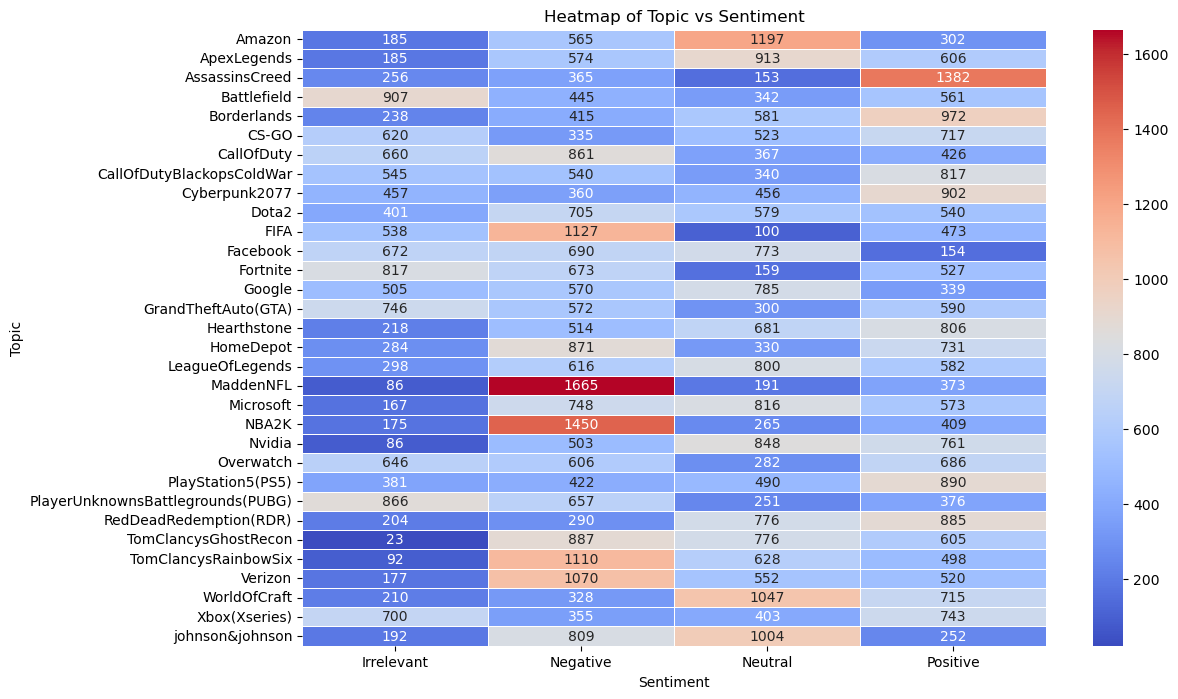

In [52]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

# CONCLUSION

In [1]:
# In conclusion, the sentiment analysis provides valuable insights into
# the prevailing attitudes and opinions within the Twitter community 
# regarding various topics. While negative sentiments appear to be more
# common overall, there is a diverse range of sentiments expressed 
# across different topics.